# Global CO2 Emission Analysis

### Purpose of this project is to chose a unique dataset, load the data, clean the data, and then explore the data in the context of three questions acting as problem statements. This project was the first capstone of five in Thinkful's Data Science program.

## Three questions:  

### 1. Which region has the most emissions, and which region has the least?


### 2. Which emission types have the highest and lowest emissions levels?


### 3. Are the emission types correlated?

### Additional. Standardize data and do a t-test. 


## About the CDIAC dataset. 

CO2 emissions are at the center of a significant global debate on the risks and validity of climate change. The data in this analysis was downloaded from the Carbon Dioxide Information Analysis Center, [CDIAC](https://cdiac.ess-dive.lbl.gov/trends/emis/overview_2014.html),and is considered to be approximations that are generally accurate. C02 emissions result from the burning of fossil fuels and the production of cement. 

In the dataset there is numeric data for five C02 emission types: solid, liquid, gas, cement, and flaring emissions grouped by region and ordered by year. The data also has aggregated totals from as early as 1751 to 2014. 

For more information about collection and processing of the data, please read the about section below or visit the website.

Common issues to consider: lack of reporting, lack of standards, lack of oversight, intentionally reporting erroneous data, pollution in international territory, clandestine pollution, construction of data regions by CDIAC, changes in nation state status like collapse of USSR, and other similar circumstances such as what does "Germany" represent as 1750 and present are significantly different.

About    
    The 1950 to present CO2 emission estimates are derived primarily from energy statistics published by the United Nations (2017), using the methods of Marland and Rotty (1984). The energy statistics were compiled primarily from annual questionnaires distributed by the U.N. Statistical Office and supplemented by official national statistical publications. As stated in the introduction of the Statistical Yearbook, "in a few cases, official sources are supplemented by other sources and estimates, where these have been subjected to professional scrutiny and debate and are consistent with other independent sources." Data from the U.S. Department of Interior's Geological Survey (USGS 2017) were used to estimate CO2 emitted during cement production. Values for emissions from gas flaring were derived primarily from U.N. data but were supplemented with data from the U.S. Department of Energy's Energy Information Administration (1994), Rotty (1974), and data provided by G. Marland. Greater details about these methods are provided in Marland and Rotty (1984), Boden et al. (1995), and Andres et al. (1999).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
sns.set(style="white")
%matplotlib inline

## Load and preprocess dataset

In [2]:
df = pd.read_csv('C:/Users/DJ/Documents/AnacondaPython/Thinkful/FilesToLoad/C02_Emissions_ALL_UTF8.csv')

In [3]:
# (ROWS, COLUMNS)
df.shape

(1768, 9)

### Rename colums so more intuitive

In [4]:
df.columns = ['Region', 'Year', 'Total', 'Solids', 'Liquids', 'Gases', 'Cement', 'Flaring', 
              'Total_Per_Capita']

### Data types and counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 9 columns):
Region              1768 non-null object
Year                1768 non-null int64
Total               1768 non-null int64
Solids              1768 non-null int64
Liquids             1768 non-null int64
Gases               1768 non-null int64
Cement              1768 non-null int64
Flaring             1768 non-null int64
Total_Per_Capita    1768 non-null object
dtypes: int64(7), object(2)
memory usage: 124.4+ KB


### Look at first five rows of dataset

In [6]:
df.head() 

,Region,Year,Total,Solids,Liquids,Gases,Cement,Flaring,Total_Per_Capita
0,Africa,1884,6,6,0,0,0,0,.
1,Africa,1885,10,10,0,0,0,0,.
2,Africa,1886,13,13,0,0,0,0,.
3,Africa,1887,13,13,0,0,0,0,.
4,Africa,1888,22,22,0,0,0,0,.


#### Analysis
Total_Per_Capita data type appears to be off, as it is listed as object, as oppossed to a numeric data type. Also "." is present in the head which is unusual. 

In [7]:
df['Total_Per_Capita'].describe()

count     1768
unique     308
top          .
freq      1118
Name: Total_Per_Capita, dtype: object

### Adjust "." issue in 'Total_Per_Capita'

In [8]:
df['Total_Per_Capita'] = pd.to_numeric(df.Total_Per_Capita, errors='coerce') 

### Descriptive statistics for each region in dataset

In [9]:
# LOOK FOR OUT OF PLACE DATA AND REVIEW DESCRIPTIVE STATISTICS
df.groupby('Region').describe().T

Region                         Africa  Centrally Planned Asia  \
Year             count     131.000000            1.230000e+02   
                 mean     1949.000000            1.953000e+03   
                 std        37.960506            3.565109e+01   
                 min      1884.000000            1.892000e+03   
                 25%      1916.500000            1.922500e+03   
                 50%      1949.000000            1.953000e+03   
                 75%      1981.500000            1.983500e+03   
                 max      2014.000000            2.014000e+03   
Total            count     131.000000            1.230000e+02   
                 mean    82153.679389            4.055080e+05   
                 std    104037.898546            6.788295e+05   
                 min         6.000000            4.900000e+01   
                 25%      6444.500000            8.119000e+03   
                 50%     21112.000000            3.763600e+04   
                 75%    153482.000000            5.171995e+05   
                 max    353814.000000            2.868887e+06   
Solids           count     131.000000            1.230000e+02   
                 mean    36760.862595            3.101118e+05   
                 std     39392.752323            5.011456e+05   
                 min         6.000000            4.900000e+01   
                 25%      6347.000000            8.119000e+03   
                 50%     18715.000000            3.613700e+04   
                 75%     66535.500000            4.158580e+05   
                 max    124526.000000            2.078153e+06   
Liquids          count     131.000000            1.230000e+02   
                 mean    27954.267176            5.605995e+04   
                 std     37766.221041            9.158678e+04   
                 min         0.000000            0.000000e+00   
                 25%       100.000000            0.000000e+00   
                 50%      1931.000000            8.830000e+02   
...                               ...                     ...   
Gases            std     17046.653568            1.776487e+04   
                 min         0.000000            0.000000e+00   
                 25%         0.000000            0.000000e+00   
                 50%        13.000000            6.000000e+00   
                 75%      8851.500000            7.193500e+03   
                 max     67972.000000            1.018530e+05   
Cement           count     131.000000            1.230000e+02   
                 mean     3367.381679            3.178120e+04   
                 std      5517.210445            7.250479e+04   
                 min         0.000000            0.000000e+00   
                 25%         0.000000            0.000000e+00   
                 50%       428.000000            6.090000e+02   
                 75%      4875.000000            1.683850e+04   
                 max     23631.000000            3.481760e+05   
Flaring          count     131.000000            1.230000e+02   
                 mean     5148.816794            6.969106e+01   
                 std      7521.543433            2.027387e+02   
                 min         0.000000            0.000000e+00   
                 25%         0.000000            0.000000e+00   
                 50%         0.000000            0.000000e+00   
                 75%     11755.500000            0.000000e+00   
                 max     23942.000000            8.770000e+02   
Total_Per_Capita count      65.000000            6.500000e+01   
                 mean        0.237538            5.916923e-01   
                 std         0.072371            5.043795e-01   
                 min         0.100000            4.000000e-02   
                 25%         0.160000            2.200000e-01   
                 50%         0.270000            4.300000e-01   
                 75%         0.290000            7.200000e-01   
                 max         0.3300

#### Analysis
* Africa's first year in this dataset is 1884, where other regions start as early as 1751.  
* Total_Per_Capita issue, ".", was due to no population values prior to 1950.
* To include all features need to adjust analysis time period to 1950-2014. 

### Use data from 1950 to 2014

In [10]:
df_1950 = df[df.Year >= 1950].copy() 

In [11]:
df_1950.head()

,Region,Year,Total,Solids,Liquids,Gases,Cement,Flaring,Total_Per_Capita
66,Africa,1950,25912,18831,6518,1,562,0,0.10
67,Africa,1951,27621,19861,7128,1,631,0,0.11
68,Africa,1952,30138,21672,7812,2,651,0,0.11
69,Africa,1953,30589,21581,8271,4,733,0,0.11
70,Africa,1954,32107,22324,8929,7,847,0,0.12


## Summary
- C02 emissions data for ten regions, ordered by year.
- Dataset contains seven data categories for each of the ten regions:   
>  Five individual emission categories: Solids, Liquids, Gases, Cement, Flaring  
>  Two aggregated CO2 emission categories per region: Total and Total Per Capita  
- Data for regions go back to 1751 for some features while others start aroung 1950.
- Per capita measures and a more centralized data collection process through the United Nations started in 1950.
- Emissions from gas flaring for some regions start after 1950, but does not materially impact analysis.
- This report will use data from 1950 to 2014. 

## 1. Which region has the most emissions, and which region has the least?

### Create a line chart to visualize trends in time-series.

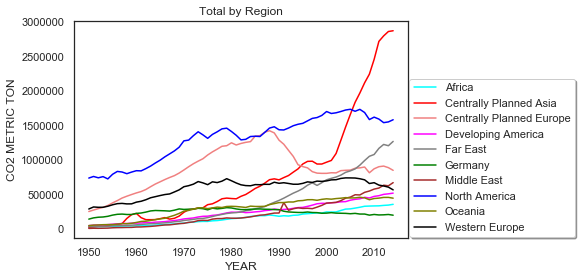

In [12]:
y   = df_1950.loc[df_1950.Region == 'Africa', 'Total']
y2  = df_1950.loc[df_1950.Region == 'Centrally Planned Asia', 'Total']
y3  = df_1950.loc[df_1950.Region == 'Centrally Planned Europe', 'Total']
y4  = df_1950.loc[df_1950.Region == 'Developing America', 'Total']
y5  = df_1950.loc[df_1950.Region == 'Far East', 'Total']
y6  = df_1950.loc[df_1950.Region == 'Germany', 'Total']
y7  = df_1950.loc[df_1950.Region == 'Middle East', 'Total']
y8  = df_1950.loc[df_1950.Region == 'North America', 'Total']
y9  = df_1950.loc[df_1950.Region == 'Oceania', 'Total']
y10 = df_1950.loc[df_1950.Region == 'Western Europe', 'Total']
x   = df_1950.loc[df_1950.Region == 'Centrally Planned Asia', 'Year']

fig = plt.figure()
ax  = plt.subplot(111)
ax.plot(x, y,   label = 'Africa',                   color = 'cyan')
ax.plot(x, y2,  label = 'Centrally Planned Asia',   color = 'red')
ax.plot(x, y3,  label = 'Centrally Planned Europe', color = 'lightcoral')
ax.plot(x, y4,  label = 'Developing America',       color = 'magenta')
ax.plot(x, y5,  label = 'Far East',                 color = 'grey')
ax.plot(x, y6,  label = 'Germany',                  color = 'green')
ax.plot(x, y7,  label = 'Middle East',              color = 'brown')
ax.plot(x, y8,  label = 'North America',            color = 'blue')
ax.plot(x, y9,  label = 'Oceania',                  color = 'olive')
ax.plot(x, y10, label = 'Western Europe',           color = 'black')
plt.xlabel('YEAR')  
plt.ylabel('CO2 METRIC TON')
plt.title('Total by Region')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc = 'upper center', bbox_to_anchor = (1.25, 0.76), shadow = True, ncol = 1)
plt.show()

### For scale and a more clear look at trend, the largest and smallest regional totals are graphed on one chart.

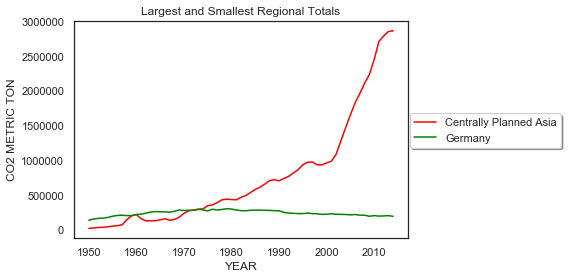

In [13]:
y   = df_1950.loc[df_1950.Region == 'Centrally Planned Asia', 'Total']
y2  = df_1950.loc[df_1950.Region == 'Germany', 'Total']
x   = df_1950.loc[df_1950.Region == 'Centrally Planned Asia', 'Year']

fig = plt.figure()
ax  = plt.subplot(111)
ax.plot(x, y,  label = 'Centrally Planned Asia', color = 'red')
ax.plot(x, y2, label = 'Germany',                color = 'green')
plt.title('Highest and lowest, absolute terms')
plt.xlabel('YEAR')    
plt.ylabel('CO2 METRIC TON')
plt.title('Largest and Smallest Regional Totals')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc = 'upper center', bbox_to_anchor = (1.23, 0.6), shadow = True, ncol = 1)
plt.show()

#### Analysis
The plot seems to be showing the region with the largest amount of CO2 emissions is Centrally Planned Asia, whose primary country is China. The lowest CO2 emission producing region is Germany. Note, this data started in 1700s. At that time the lands around Germany had a different nation-state profile and this data represents multiple countries according to our current delineations. 

## 2. Which emission type accounts for the largest emissions, and which type accounts for the fewest emissions?

#### To identify the amount of emissions for each category, the emissions are grouped by year and summed, then placed in a new dataframe. 

In [14]:
# AGGREGATE REGIONAL TOTALS INTO A GLOBAL MEASURE BY YEAR
df_1950_agg = df_1950.groupby(['Year']).sum().copy() 

### Chart the growth of each emission type over time.

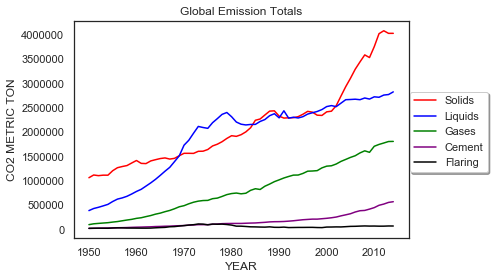

In [15]:
y  = df_1950_agg['Solids']
y2 = df_1950_agg['Liquids']
y3 = df_1950_agg['Gases']
y4 = df_1950_agg['Cement']
y5 = df_1950_agg['Flaring']
x  = df_1950_agg.index

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y,  label = 'Solids',    color = 'red')
ax.plot(x, y2, label = 'Liquids',   color = 'blue')
ax.plot(x, y3, label = 'Gases',     color = 'green')
ax.plot(x, y4, label = 'Cement',    color = 'purple')
ax.plot(x, y5, label = 'Flaring',   color = 'black')
plt.xlabel('YEAR')    
plt.ylabel('CO2 METRIC TON')
plt.title('Global Emission Totals')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc = 'upper center', bbox_to_anchor = (1.12, 0.7), shadow = True, ncol = 1)
plt.show()

#### Analysis  
>The data suggests the largest emission type is Solids which has been growing rapidly.  
The lowest emission type is Flaring whose growth appears to be flat year over year. 

### Exploration of global C02 emission total and global emission C02 total per capita over time.

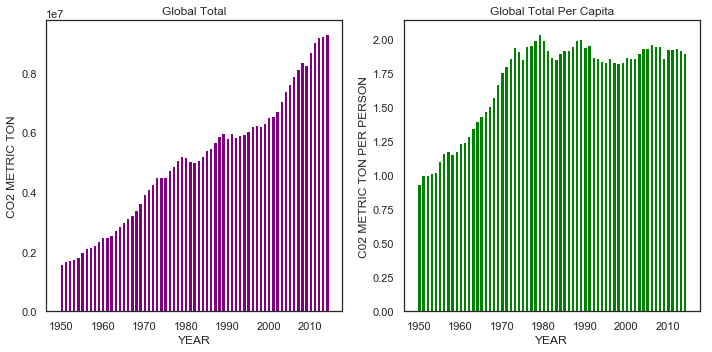

In [16]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.bar(df_1950_agg.index, df_1950_agg['Total'], color = 'purple')
plt.xlabel('YEAR')
plt.ylabel('CO2 METRIC TON')
plt.title('Global Total')

plt.subplot(1, 2, 2)
# DIVIDED BY 10, 10 REGIONS
plt.bar(df_1950_agg.index, (df_1950_agg['Total_Per_Capita']) / 10, color = 'green') 
plt.xlabel('YEAR')
plt.ylabel('C02 METRIC TON PER PERSON')
plt.title('Global Total Per Capita')
plt.tight_layout()
plt.show()

### Outlier analysis with boxplot
Create box of interquartile range, Q3 to Q1. 
+- 1.5 * (Q3-Q1) represents the "whiskers". 
Outliers are values above and below the "whiskers".

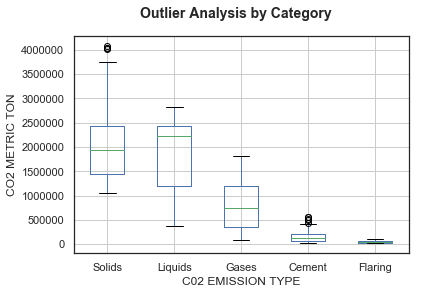

In [17]:
fig = plt.figure()
fig.suptitle('Outlier Analysis by Category', fontsize = 14, fontweight = 'bold')
ax = fig.add_subplot(111)

df_1950_agg.boxplot(column = ['Solids', 'Liquids', 'Gases', 'Cement','Flaring']);
ax.set_xlabel('C02 EMISSION TYPE')
ax.set_ylabel('CO2 METRIC TON')
plt.show()

#### Analysis
> There appears to be a fair amount of difference in absolute ranges across the emission categories, but it is hard to visually compare variances with this scale based on absolute values.  

> In order to do analysis across populations with significant differences in absolute values, going to standardize the values.    

> In the case of emission data, it is worth noting that both absolute and relative (growth rates approximation) data are significant as absolute may speak to a threshold issue, while relative may speak to trends impacting CO2 emissions in the future.

### Standardize the emission category data

In [18]:
col_list = ['Total', 'Solids', 'Liquids', 'Gases', 'Cement', 'Flaring', 'Total_Per_Capita']
for column in df_1950_agg[col_list]:
    df_1950_agg[column] = zscore(df_1950_agg[column])

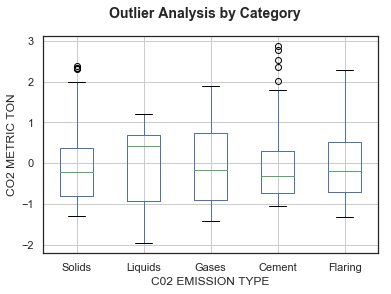

In [19]:
fig = plt.figure()
fig.suptitle('Outlier Analysis by Category', fontsize = 14, fontweight = 'bold')
ax = fig.add_subplot(111)

df_1950_agg.boxplot(column = ['Solids', 'Liquids', 'Gases', 'Cement','Flaring']);
ax.set_xlabel('C02 EMISSION TYPE')
ax.set_ylabel('CO2 METRIC TON')
plt.show()

#### Analysis:
There are a few outliers in Solids and Cement, but visually, there does not seem to be a significant difference in mean, variance, and inner quartile densities from feature to feature after standardization. Liquids has the highest mean and lowest wisker, but all in all, relatively similar to others.

### Chart standardized emission totals

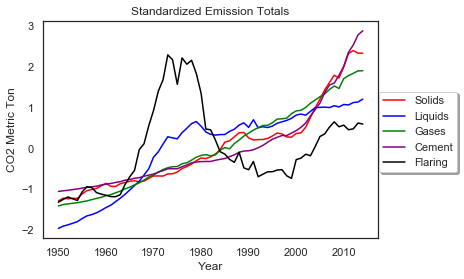

In [20]:
y  = df_1950_agg['Solids']
y2 = df_1950_agg['Liquids']
y3 = df_1950_agg['Gases']
y4 = df_1950_agg['Cement']
y5 = df_1950_agg['Flaring']
x  = df_1950_agg.index

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y,  label = 'Solids',    color = 'red')
ax.plot(x, y2, label = 'Liquids',   color = 'blue')
ax.plot(x, y3, label = 'Gases',     color = 'green')
ax.plot(x, y4, label = 'Cement',    color = 'purple')
ax.plot(x, y5, label = 'Flaring',   color = 'black')
plt.xlabel('Year')    
plt.ylabel('CO2 Metric Ton')
plt.title('Standardized Emission Totals')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width * 1, chartBox.height])
ax.legend(loc = 'upper center', bbox_to_anchor = (1.12, 0.7), shadow = True, ncol = 1)
plt.show()

### Chart emission totals next to emission totals per capita

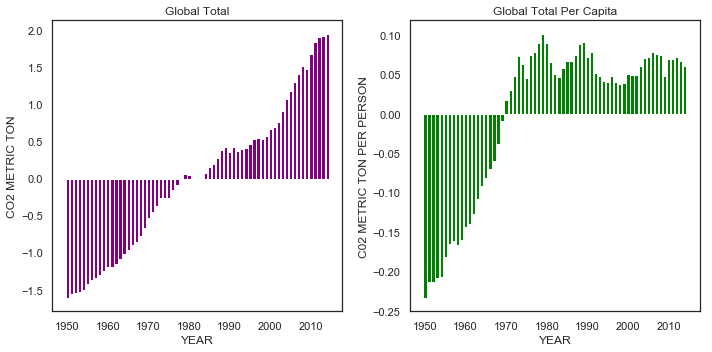

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.bar(df_1950_agg.index, df_1950_agg['Total'], color = 'purple')
plt.xlabel('YEAR')
plt.ylabel('CO2 METRIC TON')
plt.title('Global Total')

plt.subplot(1, 2, 2)
# DIVIDED BY 10, 10 REGIONS
plt.bar(df_1950_agg.index, (df_1950_agg['Total_Per_Capita']) / 10, color = 'green') 
plt.xlabel('YEAR')
plt.ylabel('C02 METRIC TON PER PERSON')
plt.title('Global Total Per Capita')
plt.tight_layout()
plt.show()

#### Analysis  
> In absolute terms, Solid emissions are the largest percentage of Total Emissions. In standardized terms, Cement emissions are growing the fastest.  

>  Growth in total CO2 emissions is more or less linear. Population growth, not shown here, is linear as well. Global Total Per Capita, despite going sideways to down since the mid 1970s, represents the potential significance of population on CO2 emissions. Population in 1975 = 4079087198. In 2014 population = 7298453033. Population hasn't quite doubled, but has increased about 79%. Yet the Global Total Per Capita has stayed roughly the same. Energy infrastructure investments, production of goods, and consumption behaviors have not changed much since 1975 when viewed on a per person basis. Said another way, population has gone up linearly, and so has total emissions of CO2. Correlation does not mean causation, but it would appear population and likely regional economic growth would be relevant to this study. 

## 3. Are the emission types correlated?

In [22]:
corr = df_1950_agg.drop(['Total_Per_Capita'], axis = 1).corr() 
corr.style.background_gradient(cmap = 'coolwarm')

,Total,Solids,Liquids,Gases,Cement,Flaring
Total,1,0.966268,0.935024,0.98867,0.934476,0.380536
Solids,0.966268,1,0.815556,0.965795,0.982195,0.24198
Liquids,0.935024,0.815556,1,0.898373,0.757858,0.55246
Gases,0.98867,0.965795,0.898373,1,0.941703,0.269607
Cement,0.934476,0.982195,0.757858,0.941703,1,0.251577
Flaring,0.380536,0.24198,0.55246,0.269607,0.251577,1


#### Analysis   
> Correlation values range from 1 to -1. Values closer to 1 are highly correlated, values closer to -1 have high inverse correlation. Correlations in the matrix above show multiple relationships over .9. This means those two variables are highly correlated. The significance is high correlations speak to a possibility that the driving forces behind the emission variable, such as population and economic growth, may be significant to all the emission features. However correlation does not mean causation, so additional research and modeling is required.   

>  Solids, Gases, Liquids, and Cement are all highly correlated with the Total C02 emission category. Flaring has a relatively low correlation, which means that Flaring C02 emissions are more independent.  

## Conclusion  
- Population growth appears to be significant to C02 emission growth.  
- Develeped, "Old World", countries appear to have a lower emission growth rate as seen on the charts in the past 10 years. 
- Generally speaking, European countries have a low absolute value and a low emission growth rate. 
- Far East (Russia) and Centrally Planned Asia (China) both appear to be growing steadily and have high absolute values, particularly China.
- The trend of all emission types, except for flaring, when looked at globally, appear to be growing as of 2014. 
- Solids and flaring appear to be moving sideways year over year in past ten years, where liquids, gas and cement emissions appear to be growing steadily.
- Generally speaking the emission types are highly correlated except for flaring.

## Proposal for additional research

Propose researching the significance of population growth, primary power generation, and economic growth including construction, agriculture, and industry per region to gain better insights into the growth and absolute values of C02 emissions.   

From the insights, would begin to create a model to predict future growth of C02 emissions based on power infrastructure type, demographics.   

Question 1: Is population growth a significant driver of C02 emissions?    
Question 2: Is power generation type a significant driver of C02 emissions?  
Question 3: Is economic growth a significant driver of CO2 emissions?     

Knowing the carbon emission footprints by regional and subgroupings could shed a significant amount of insight into C02 emissions.  

High level data plan:   
* Get data.   
* Look for seasonal trends, if any, in the data.   
* Explore data on the aggregate and by regional subgroups.    

Build a predictive model to forecast growth.   

## Additional: T-Test
> Perform a T-Test on two variables and  explain findings. 
Will compare two pairs of emission types using a T-Test after plotting the two population densities with a histogram.

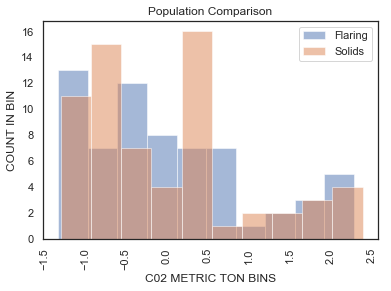

In [23]:
Flaring  = df_1950_agg['Flaring']
Solids = df_1950_agg['Solids']
plt.hist(Flaring,  alpha = 0.5, label = 'Flaring')
plt.hist(Solids, alpha = 0.5, label = 'Solids')
plt.legend(loc = 'upper right')

plt.xlabel('C02 METRIC TON BINS')
plt.ylabel('COUNT IN BIN')
plt.title('Population Comparison')
plt.xticks(rotation=90)
plt.show()

### T-Test  
Below uses a two-sided test to check if the population variances are identical.   
Null hypothesis (H0): The 2 independent samples have identical average values.   
Assumption:  The population variances are identical.   
Level of significance for pvalue: .05  

If pvalue >= .05 then fail to reject H0.  
If pvalue <  .05 then reject H0.

In [24]:
from scipy.stats import ttest_ind
print(ttest_ind(Flaring, Solids))

Ttest_indResult(statistic=-4.73443264464646e-16, pvalue=0.9999999999999997)


#### Analysis
Fail to reject H0.  

After standardization, the populations are identical. This is what standardization does, it sets the mean to zero and with a standard deviation of 1. These populations should be identical after this process. These are not absolute values. 

This observation is based on a two-tailed T-Test where calculated pvalue > .05, the level of significance.   

To summarize, we can conclude that the mean of Total and the mean of Solids are the same with confidence. The populations are similar.

### Revert back to absolute values and do a T-Test on same two sample populations.

In [25]:
# AGGREGATE REGIONAL TOTALS INTO A GLOBAL MEASURE BY YEAR
df_1950_agg = df_1950.groupby(['Year']).sum() 

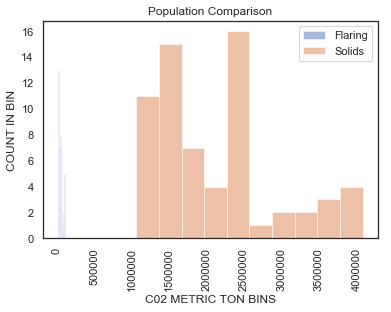

In [31]:
# LOW CORRELATION > .25
Flaring  = df_1950_agg['Flaring']
Solids = df_1950_agg['Solids']
plt.hist(Flaring, alpha = 0.5, label = 'Flaring')
plt.hist(Solids, alpha = 0.5, label = 'Solids')
plt.legend(loc = 'upper right')

plt.xlabel('C02 METRIC TON BINS')
plt.ylabel('COUNT IN BIN')
plt.title('Population Comparison')
plt.xticks(rotation=90)
plt.show()

### T-Test  
Below uses a two-sided test to check if the population variances are identical.   
Null hypothesis (H0): The 2 independent samples have identical average values.   
Assumption:  The population variances are identical.   
Level of significance for pvalue: .05  

If pvalue >= .05 then fail to reject H0.  
If pvalue <  .05 then reject H0.  

In [27]:
from scipy.stats import ttest_ind
print(ttest_ind(Flaring, Solids))

Ttest_indResult(statistic=-20.182846148932118, pvalue=1.3631333669928998e-41)


#### Analysis
Reject H0. The difference between the sample populations are significant, meaning they are different. 

This observation is based on a two-tailed T-Test where calculated pvalue < .05, the level of significance.   

To summarize, we can conclude that the Flaring and Solids sample populations are different with confidence.

Observation, two populations that have not been standardized can have different means and standard deviations where standardized populations have a mean of zero and a standard deviation of one. 